# Import Data from pandas&numpy

** # 종전에 unicodecsv 패키지에서 불러 오는 것보다, 아래 pandas 에서 csv reading 하는 것이 훨씬 빠름  **

In [109]:
#대략 1분정도 걸림
import unicodecsv
def read_csv(filename):
    with open(filename,'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
daily_engagement = read_csv('datasets/daily_engagement_full.csv')

In [110]:
#unique function을 아래 pandas를 이용하면 쉽게 구할 수 있음
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['acct'])
    return unique_students

unique_engagement_students = get_unique_students(daily_engagement)
len(unique_engagement_students)

1237

pandas로 csv read하는게 더 빠름:
> 
```css
dframe = pd.read_csv('path/filename.csv', \ 
                    index_col = 'index로 쓸 column 지정' )
```
> 

In [111]:
import pandas as pd
daily_engagement = pd.read_csv('datasets/daily_engagement_full.csv')
len(daily_engagement['acct'].unique()) # unique function 있음

1237

# NumPy Arrays

### data structures
![nparray](images/numpyarrays.png)

### Difference between List and np Array
![nparray2](images/numpyarrays-2.png)


In [112]:
import numpy as np

# First 20 countries with employment data
countries = np.array([
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina'
])

# Employment data in 2007 for those 20 countries
employment = np.array([
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
])

# Change False to True for each block of code to see what it does

# Element types
if True:
    print '==Types=='
    print countries.dtype
    print employment.dtype
    print np.array([0, 1, 2, 3]).dtype
    print np.array([1.0, 1.5, 2.0, 2.5]).dtype
    print np.array([True, False, True]).dtype
    print np.array(['AL', 'AK', 'AZ', 'AR', 'CA']).dtype

# Looping
if False:
    print '==Looping=='
    for country in countries:
        print 'Examining country {}'.format(country) # format 함수 check

    for i in range(len(countries)):
        country = countries[i]
        country_employment = employment[i]
        print 'Country {} has employment {}'.format(country,
                country_employment)

# Numpy functions
if True:
    print '==Numpy Functions=='
    print employment.mean()
    print employment.std()
    print employment.max()
    print employment.sum()

"""
#Uda answer - 1: 탐색적으로 서치해서 최고값 업데이트 하는 식
def max_employment(countries, employment): 
    max_country = None
    max_employment = 0
    
    for i in range(len(countries)):
        country = countries[i]
        country_employment = employment[i]
        if country_employment > max_employment :
            max_country = country 
            max_employment = country_employment
            
    return (max_country, max_value)
    """
#uda answer 2: argmax()
def max_employment2(countries, employment): 
    ix = employment.argmax()
    return (countries[ix], employment[ix])


#max_employment(countries, employment)
max_employment2(countries, employment)

#기타: np.where 사용 
x =  np.where(employment == employment.max())
print employment[x]
print countries[x]

==Types==
|S22
float64
int64
float64
bool
|S2
==Numpy Functions==
58.6850000385
9.33826911369
75.69999695
1173.70000077
[ 75.69999695]
['Angola']


>  
```css
list_name.argmax()
```
returning index of maximum value
>

# Vectorized Operations 
(생략)

# Standardizing Data

In [113]:
country_name = 'United States'

def standardize_data(values):
    std_values = (values - values.mean()) / values.std()
    return std_values

standardize_data(employment)

array([-0.31965231, -0.780123  , -0.87650077,  1.82207181, -0.03051941,
       -1.99019768,  0.30144772, -0.16973184,  0.23719615,  0.84758731,
        0.18365304,  1.00821665,  0.87971351, -0.56595055, -1.07996476,
       -0.20185762,  1.38301845, -0.03051941,  1.2545153 , -1.87240259])

# Numpy Index Arrays

![npindex](images/numpyindex.png)

In [114]:
import numpy as np

# Change False to True for each block of code to see what it does
# ===
# Using index arrays
if False:
    a = np.array([1, 2, 3, 4])
    b = np.array([True, True, False, False])
    
    print a[b]
    print a[np.array([True, False, True, False])]
    
# Creating the index array using vectorized operations
if True:
    a = np.array([1, 2, 3, 2, 1])
    b = (a >= 2)
    
    print a[b]
    print a[a >= 2]
    
# Creating the index array using vectorized operations on another array
if True:
    a = np.array([1, 2, 3, 4, 5])
    b = np.array([1, 2, 3, 2, 1])
    
    print b == 2
    print a[b == 2]

'''
#my Answer: 요구사항인 mean()을 안씀
def mean_time_for_paid_students(time_spent, days_to_cancel):
    #paid_students = days_to_cancel[ days_to_cancel >=7] # 비교: boolean이 True일때의 element만 리턴
    paid_students = days_to_cancel >=7 # 비교: boolean array 리턴
    res = time_spent[paid_students] 
    return res
'''

#Uda Answer:
def mean_time_for_paid_students(time_spent, days_to_cancel):
    '''
    is_paid = days_to_cancel >= 7
    paid_time = time_spent[is_paid] # [] () 
    return paid_time.mean()
    '''
    return time_spent[days_to_cancel >=7].mean() #위 과정 한줄 코드.

# Time spent in the classroom in the first week for 20 students
time_spent = np.array([
       12.89697233,    0.        ,   64.55043217,    0.        ,
       24.2315615 ,   39.991625  ,    0.        ,    0.        ,
      147.20683783,    0.        ,    0.        ,    0.        ,
       45.18261617,  157.60454283,  133.2434615 ,   52.85000767,
        0.        ,   54.9204785 ,   26.78142417,    0.
])

# Days to cancel for 20 students
days_to_cancel = np.array([
      4,   5,  37,   3,  12,   4,  35,  38,   5,  37,   3,   3,  68,
     38,  98,   2, 249,   2, 127,  35
])


print 'answer = ',mean_time_for_paid_students(time_spent, days_to_cancel)



[2 3 2]
[2 3 2]
[False  True False  True False]
[2 4]
answer =  41.0540034855



# in-place vs Not in-place operations

아래 결과는 둘이 동작 방식이 다름을 알려줌 

![plus](images/updateplus.png)

+= 는 값을 업데이트 하는 형식. in-place 방식의 연산

![inplace](images/inplace.png)

아래를 보면, 기대와는 색다른 방식으로 numpy array가 동작함을 알 수 있음

![inplace](images/inplace2.png)

In [115]:
a = np.array([1,2,3,4,5])
slice = a[:3]
slice[0] = 100

print a #> not 1,2,3,4,5 but 100, 2,3,4,5
print slice

[100   2   3   4   5]
[100   2   3]


# Pandas Series

![pandass](images/pandas.png)

In [116]:
import pandas as pd

countries = ['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
             'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
             'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
             'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia']

life_expectancy_values = [74.7,  75. ,  83.4,  57.6,  74.6,  75.4,  72.3,  81.5,  80.2,
                          70.3,  72.1,  76.4,  68.1,  75.2,  69.8,  79.4,  70.8,  62.7,
                          67.3,  70.6]

gdp_values = [ 1681.61390973,   2155.48523109,  21495.80508273,    562.98768478,
              13495.1274663 ,   9388.68852258,   1424.19056199,  24765.54890176,
              27036.48733192,   1945.63754911,  21721.61840978,  13373.21993972,
                483.97086804,   9783.98417323,   2253.46411147,  25034.66692293,
               3680.91642923,    366.04496652,   1175.92638695,   1132.21387981]

# Life expectancy and gdp data in 2007 for 20 countries
life_expectancy = pd.Series(life_expectancy_values)
gdp = pd.Series(gdp_values)

# Change False to True for each block of code to see what it does

# Accessing elements and slicing
if False:
    print "@accesing and slicing"
    print life_expectancy[0]
    print gdp[3:6]
    
# Looping
if False:
    print "@Looping"
    for country_life_expectancy in life_expectancy:
        print 'Examining life expectancy {}'.format(country_life_expectancy)
        
# Pandas functions
if False:
    print "@Functions"
    print life_expectancy.mean()
    print life_expectancy.std()
    print gdp.max()
    print gdp.sum()

# Vectorized operations and index arrays
if False:
    print "@vectorized op"
    a = pd.Series([1, 2, 3, 4])
    b = pd.Series([1, 2, 1, 2])
  
    print a + b
    print a * 2
    print a >= 3
    print a[a >= 3]
   
def variable_correlation(variable1, variable2):
    '''
    Fill in this function to calculate the number of data points for which
    the directions of variable1 and variable2 relative to the mean are the
    same, and the number of data points for which they are different.
    Direction here means whether each value is above or below its mean.
    
    You can classify cases where the value is equal to the mean for one or
    both variables however you like.
    
    Each argument will be a Pandas series.
    
    For example, if the inputs were pd.Series([1, 2, 3, 4]) and
    pd.Series([4, 5, 6, 7]), then the output would be (4, 0).
    This is because 1 and 4 are both below their means, 2 and 5 are both
    below, 3 and 6 are both above, and 3 and 4 are both above.
    
    On the other hand, if the inputs were pd.Series([1, 2, 3, 4]) and
    pd.Series([7, 6, 5, 4]), then the output would be (0, 4).
    This is because 1 is below its mean but 7 is above its mean, and
    so on.
    '''
    both_above = (variable1 > variable1.mean()) & \
                 (variable2 > variable2.mean())   
    both_below = (variable1 < variable1.mean()) & \
                 (variable2 < variable2.mean()) 
    
    is_same_direction = both_above | both_below
    num_same_direction = is_same_direction.sum()
    num_different_direction = len(variable1) - num_same_direction
    
    return (num_same_direction, num_different_direction)

variable_correlation(life_expectancy, gdp)

(17, 3)

# Series Indexes

### #Benefit of pandas over numpy?
1) describe()와 같은 유용한 함수 제공

In [117]:
a = np.array([1,2,3,4])
s = pd.Series([1,2,3,4])
s.describe()

count    4.000000
mean     2.500000
std      1.290994
min      1.000000
25%      1.750000
50%      2.500000
75%      3.250000
max      4.000000
dtype: float64

2) index를 쓸수있다가 가장 큰 차별적 가치 : pandas is like a cross btw a list and a dictionary

In [118]:
#test_countries = ['Albania', 'Algeria', 'Andorra', 'Angola']
#test_life_exp = np.array([74.7,  75. ,  83.4,  57.6])

test_life_exp = pd.Series([74.7,  75. ,  83.4,  57.6],\
                          index = ['Albania', 'Algeria', 'Andorra', 'Angola'] )
test_life_exp

Albania    74.7
Algeria    75.0
Andorra    83.4
Angola     57.6
dtype: float64

### # position과 index로 모두 value look-up 할수 있음   
- **index 로 열람**
>  
```css
series_x.loc['index name']
```
> 

In [119]:
print test_life_exp[0] # position으로 look-up 
print test_life_exp.loc['Angola'] # index로 look-up

74.7
57.6


인덱스 값 지정 디폴트로 0,1,2,3

In [120]:
pd.Series([11,22,33,44])

0    11
1    22
2    33
3    44
dtype: int64

- **position으로 열람**
>  
```css
series_x.iloc[position]
```
> 

In [121]:
#아래 두 명령문은 동일
print test_life_exp.iloc[0] #pandas에서 좀더 혼동없이 명확히 쓸수 있음
print test_life_exp[0]

74.7
74.7


In [122]:
countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina'
]

employment_values = [
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
]

# Employment data in 2007 for 20 countries
employment = pd.Series(employment_values, index=countries)

def max_employment(employment):
    max_country = employment.argmax()      
    max_value = employment.loc[max_country]   
    return (max_country, max_value)

print max_employment(employment)

('Angola', 75.699996949999999)


# Vectorized Operations and Series Indexes
* ** pandas는 index에 맞춰 벡터연산을 함. 오버랩 안될때는 NaN 처리 **


In [123]:
import pandas as pd

# Change False to True for each block of code to see what it does

print "/// Addition when indexes are the same"
if True:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
    print s1 + s2

print  "/// Indexes have same elements in a different order "
if True:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['b', 'd', 'a', 'c'])
    print s1 + s2

print "/// Indexes overlap, but do not have exactly the same elements"
if True:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
    print s1 + s2

print "/// Indexes do not overlap "
if True:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['e', 'f', 'g', 'h'])
    print s1 + s2

/// Addition when indexes are the same
a    11
b    22
c    33
d    44
dtype: int64
/// Indexes have same elements in a different order 
a    31
b    12
c    43
d    24
dtype: int64
/// Indexes overlap, but do not have exactly the same elements
a   NaN
b   NaN
c    13
d    24
e   NaN
f   NaN
dtype: float64
/// Indexes do not overlap 
a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
f   NaN
g   NaN
h   NaN
dtype: float64


### #NaN 처리: dropna() 또는 0으로 값을 처리해서 사용

>  
```css
ex_series/dataframe.dropna()
```
>

기타 missing value 처리방법: [pandas 문서](http://pandas.pydata.org/pandas-docs/stable/missing_data.html)

In [124]:
#dropna
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
print (s1 + s2)
print "dropping na ==> \n",(s1 + s2).dropna()

a   NaN
b   NaN
c    13
d    24
e   NaN
f   NaN
dtype: float64
dropping na ==> 
c    13
d    24
dtype: float64



>  
```css
ex_ss.isnull()
or
ex_ss1.add(ex_S2, fill_value=0)
```
>

In [125]:
#treating as 0 (is.null 이용방법)
sum_series = s1+s2
sum_series[sum_series.isnull()] = 0 
print sum_series

a     0
b     0
c    13
d    24
e     0
f     0
dtype: float64


~.isnull()로 boolean series를 이용해서 0 대입함

In [126]:
#treating as 0 (~.add(fillvalue=0) 이용방법)
sum_series = s1.add(s2,fill_value=0)
print sum_series

a     1
b     2
c    13
d    24
e    30
f    40
dtype: float64


# Pandas " `apply()` "
![built-in](images/non-builtin.png)


### # apply 용례: python 의 map()함수와 동일하지만, List가 아니라 Series/dataframe에서 동작하는 함수
>  
```css
s = pd.Series([1, 2, 3, 4, 5])
def add_one(x):
    return x + 1
print s.apply(add_one)
```
>

In [145]:
# I want 'CA','OH,'MI','NY'
def clean_state_f(state):
    if len(state) == 2: 
        return state
    elif state == 'California':
        return 'CA'
    elif state == 'Michigan':
        return 'MI'   

In [146]:
# pandas의 apply 안쓰고 무식하게 할때:
states = ['California','OH','Michigan','NY']
clean_states = []
for state in states:
    clean_states.append(clean_state_f(state))
clean_states

['CA', 'OH', 'MI', 'NY']

In [147]:
# apply()
states = pd.Series(['California','OH','Michigan','NY'])
clean_states = states.apply(clean_state_f)
clean_states

0    CA
1    OH
2    MI
3    NY
dtype: object

In [173]:
# Example pandas apply() usage (although this could have been done
# without apply() using vectorized operations)
names = pd.Series([
    'Andre Agassi',
    'Barry Bonds',
    'Christopher Columbus',
    'Daniel Defoe',
    'Emilio Estevez',
    'Fred Flintstone',
    'Greta Garbo',
    'Humbert Humbert',
    'Ivan Ilych',
    'James Joyce',
    'Keira Knightley',
    'Lois Lane',
    'Mike Myers',
    'Nick Nolte',
    'Ozzy Osbourne',
    'Pablo Picasso',
    'Quirinus Quirrell',
    'Rachael Ray',
    'Susan Sarandon',
    'Tina Turner',
    'Ugueth Urbina',
    'Vince Vaughn',
    'Woodrow Wilson',
    'Yoji Yamada',
    'Zinedine Zidane'
])

"""
#my answer
def reverse_names(names):
    res = names.split()[1] + ' ' + names.split()[0] 
    #res = names.split()[1] + ' ' + names.split()[0] 
    return res

print names.apply(reverse_names) 
"""

#Uda-answer: 
def reverse_name(names):
    split_name = names.split(" ")
    first_name = split_name[0]
    last_name = split_name[1]
    return last_name + ", " + first_name
def reverse_names(names):
    return names.apply(reverse_name)

reverse_names(names)

0             Agassi, Andre
1              Bonds, Barry
2     Columbus, Christopher
3             Defoe, Daniel
4           Estevez, Emilio
5          Flintstone, Fred
6              Garbo, Greta
7          Humbert, Humbert
8               Ilych, Ivan
9              Joyce, James
10         Knightley, Keira
11               Lane, Lois
12              Myers, Mike
13              Nolte, Nick
14           Osbourne, Ozzy
15           Picasso, Pablo
16       Quirrell, Quirinus
17             Ray, Rachael
18          Sarandon, Susan
19             Turner, Tina
20           Urbina, Ugueth
21            Vaughn, Vince
22          Wilson, Woodrow
23             Yamada, Yoji
24         Zidane, Zinedine
dtype: object

# Plotting in Pandas

>  
```css
import matplotlib.pyplot as plt
plt.hist(data)
```
>  

In [183]:
import pandas as pd
import seaborn as sns
# The following code reads all the Gapminder data into Pandas DataFrames. 

path = 'datasets/'
employment = pd.read_csv(path + 'employment_above_15.csv', index_col='Country')
female_completion = pd.read_csv(path + 'female_completion_rate.csv', index_col='Country')
male_completion = pd.read_csv(path + 'male_completion_rate.csv', index_col='Country')
life_expectancy = pd.read_csv(path + 'life_expectancy.csv', index_col='Country')
gdp = pd.read_csv(path + 'gdp_per_capita.csv', index_col='Country')

# The following code creates a Pandas Series for each variable for the United States.
# You can change the string 'United States' to a country of your choice.

employment_us = employment.loc['United States']
female_completion_us = female_completion.loc['United States']
male_completion_us = male_completion.loc['United States']
life_expectancy_us = life_expectancy.loc['United States']
gdp_us = gdp.loc['United States']

# Uncomment the following line of code to see the available country names
# pandas.Index.values: return the underlying data as an ndarray
print employment.index.values 


# Use the Series defined above to create a plot of each variable over time for
# the country of your choice. You will only be able to display one plot at a time
# with each "Test Run".

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Rep.' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo, Rep.' 'Congo, Dem. Rep.' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czech Rep.' 'Denmark' 'Dominican Rep.' 'Timor-Leste'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guadeloupe' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hong Kong, China' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Korea, Dem. Rep.' 'Korea, Rep.' 'Kuwait'
 'Kyrgyzstan

Populating the interactive namespace from numpy and matplotlib


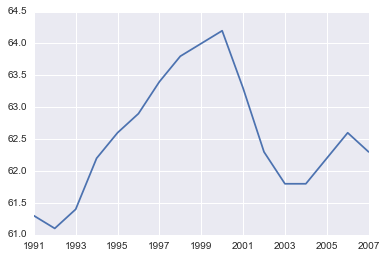

In [185]:
%pylab inline
employment_us.plot()